<a href="https://colab.research.google.com/github/colinchu1/CAP4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTS



In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.model_selection import train_test_split

#Problem 1 
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1). 

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:

Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
Choose the first feature x_1 uniformly at random in the interval [0, 1).
Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
The ith row of the array data consists of the features x_1 and x_2.
The ith entry of the vector labels is the class label c.
Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = [[] for j in range(m)] 
  labels = []
  for x in range (0,m):
    c = random.randint(0,1)
    x_1 = np.random.uniform()
    n = np.random.normal(mu, sigma)
    x_2 = w * x_1 + b + (-1)**c * n
    data[x].append(x_1)
    data[x].append(x_2)
    labels.append(c)
  return data, labels

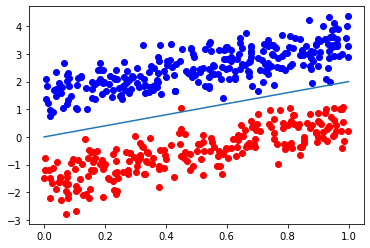

In [0]:
mu , sigma = 1.5,0.5
m = 500
w = 2
b = 0
data, labels = get_random_data(w,b,mu,sigma,m)
data = np.array(data)
labels = np.array(labels)
cdict = {1: 'red', 2: 'blue'}
def display_random_data(labels, data):
  plt.figure()
  #plt.scatter(data[:,0], data[:,1])
  for x in range(0,m):
    #if label is 0 be blue if 1 be red
    if labels[x] == 0:
      c = 2
    else:
      c = 1
    plt.scatter(data[x][0], data[x][1], color = cdict[c])
  x = np.linspace(0,1,500)
  y = w * x + b
  #plot the true line
  plt.plot(x,y)
  plt.show()
#display the data
display_random_data(labels,data)

In [0]:
# split the data
X_train, X_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
#sanity check
print (X_train.shape, labels_train.shape)
print (X_test.shape, labels_test.shape)

(400, 2) (400,)
(100, 2) (100,)


#Problem 2
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss. How well does the trained model separate the red and blue dots? You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function get_weights. See https://keras.io/layers/about-keras-layers/.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer). This is not immediately obvious. It maybe helpful to take a look at the heatmap below.

The trained model realizes function f : R^2 -> R that takes two features as input and outputs a number in the interval [0, 1]. Use a heatmap to visualize this function.

###import keras dense layer. sequential model

In [0]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import initializers
model = Sequential() 
model.add(Dense(1, input_shape= (2,), activation='sigmoid' ,bias_initializer=initializers.Constant(1),)) 
#sanity check on weights and bias
weight0=model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(weight0)
print(bias)

[[-0.10325837]
 [ 1.0838784 ]]
[1.]


Training the model and track validation loss and accruacy

In [0]:
from tensorflow.python.keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = 'SGD',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, labels_train,batch_size=1,epochs=10, validation_data=(X_test, labels_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5851 - accuracy: 0.7950 - val_loss: 0.2286 - val_accuracy: 0.9600
Epoch 2/10
400/400 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9550 - val_loss: 0.1600 - val_accuracy: 0.9800
Epoch 3/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1536 - accuracy: 0.9625 - val_loss: 0.1272 - val_accuracy: 0.9800
Epoch 4/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1279 - accuracy: 0.9675 - val_loss: 0.1068 - val_accuracy: 0.9800
Epoch 5/10
400/400 [==============================] - 0s 1ms/step - loss: 0.1108 - accur

In [0]:
#sanity check
test_loss, test_acc = model.evaluate(X_test,  labels_test, verbose=2)
print(test_loss)
print(test_acc)


4/4 - 0s - loss: 0.0582 - accuracy: 1.0000
0.05820290744304657
1.0


### ${y= w_1x_1 + w_2x_2 + b}$ 
### ${0= w_1x_1 + w_2x_2 + b}$ 
solve for ${x_2}$

${x_2}$= -${(w_1/w_2)x_1 - (b/w_2)}$

y = wx + b

${w = -(w_1/w_2)}$

${b = - (b/w_2)}$

##Display the data with separating line by the model prediction and true line

[array([[ 1.016285 ],
       [-2.5803666]], dtype=float32), array([1.795504], dtype=float32)]
[1.016285]
0


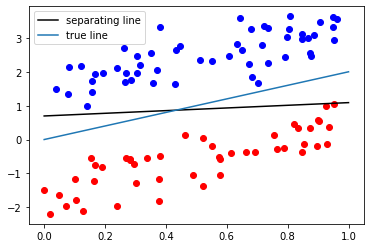

In [0]:
#plt.scatter(data[:,0], data[:,1])
for x in range(0,100):
  #if label is 0 be blue,  else red
  if labels_test[x] == 0:
    c = 2
  else:
    c = 1
  #plot the data
  plt.scatter(X_test[x][0], X_test[x][1], color = cdict[c])
x = np.linspace(0,1,100)
#get weight from model
weights = model.get_weights()
#sanity check
print(weights)
w1 = weights[0][0]
#sanity check
print(w1)
#find slope and y-intercept
w2 = weights[0][1]
bias = weights[1][0]
pre_b = -bias/w2
pre_w = -w1/w2
pre_y = pre_w*x+pre_b
y = w*x+b
#sanity check
print(b)
plt.plot(x, pre_y ,'k-',label = 'separating line')
plt.plot(x,y ,label = 'true line')
plt.legend()
plt.show()

##Display the heat map made with the prediction from the model

In [0]:
def heatmap(data):
  # Creates X, Y plane
  xx = np.linspace(0, 1, 100)
  y_min = min(X_test[:,1])
  y_max = max(X_test[:,1])
  yy = np.linspace(y_min, y_max, 100)
  X1, Y1 = np.meshgrid(xx, yy)
  # Creates Z values based on x, y grid
  X_flat = X1.flatten()
  Y_flat = Y1.flatten()
  Z = np.column_stack((X_flat, Y_flat))
  #sanity check
  print(Z.shape)
  Z = model.predict(Z)
  #sanity check
  print(Z.shape)
  Z = Z.reshape((100,100))

  # Configures the plot
  fig = plt.figure()
  ax = plt.axes()

  # Draws the heatmap
  contours = ax.contourf(X1, Y1, Z, 100, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')
    
  # Gives a colorbar (should be in range [0,1])
  plt.colorbar(im, ax=ax)

(10000, 2)
(10000, 1)


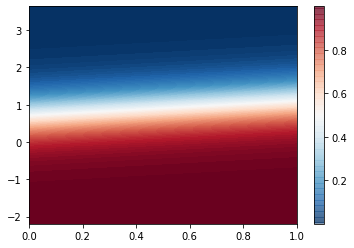

In [0]:
heatmap(data)

#Problem 3 
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.
Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set.

In [0]:
def predict(a):
    return 0 if a < 0.5 else 1
def test_model(test_data, test_labels, W_b):
    correct_predictions = 0
    total_loss = 0
    testd = np.column_stack((test_data, np.ones(shape=(test_data.shape[0], 1))))
    for i_data in range(len(test_data)):
        # Process the input
        z = np.dot(testd[i_data], W_b)
        a = sigmoid(z)

        # Make a prediction
        p = predict(a)
        if p == test_labels[i_data]:
            correct_predictions += 1
        
        # Determine loss
        total_loss += binary_crossentropy(a, test_labels[i_data])
    # Return a summary
    print(total_loss)
    return (total_loss / len(test_data), correct_predictions / len(test_data))
def sigmoid (z):
    return 1 / (1 + np.exp(-z))
def binary_crossentropy(a, label):
    return -label*np.log(a) - (1 - label)*np.log(1 - a)
def logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learing_rate):
    # Randomize the initial weights
    W_b = np.random.random_sample((3, ))
    #combine data with biases
    trd = np.column_stack((X_train, np.ones(shape=(X_train.shape[0], 1))))
    for epoch in range(epochs):
        # Only perform stochastic gradient descent
        for i_data in range(len(train_data)):
            # Process the input
            z = np.dot(trd[i_data], W_b)
            a = sigmoid(z)

            # Determine the gradient of the loss
            Lg_b = (a- train_labels[i_data])* trd[i_data]

            # Apply the gradient to the weights
            W_b -= Lg_b * learning_rate
        
        # Analyze the loss and accuracy for each epoch
        loss, accuracy = test_model(test_data, test_labels, W_b)
        print(f'Epoch {epoch+1}/{epochs} - val_loss: {loss} - val_accuracy: {accuracy}')
    
    # Return the trained weights
    return W_b

Doing logistic regression

In [33]:
epochs = 10
learning_rate = 0.01

W_b = logistic_regression(X_train, labels_train, X_test, labels_test, epochs, learning_rate)

19.93760653745199
Epoch 1/10 - val_loss: 0.1993760653745199 - val_accuracy: 0.98
13.781985987730451
Epoch 2/10 - val_loss: 0.1378198598773045 - val_accuracy: 0.98
10.898837563721269
Epoch 3/10 - val_loss: 0.1089883756372127 - val_accuracy: 0.98
9.141858564560176
Epoch 4/10 - val_loss: 0.09141858564560175 - val_accuracy: 0.99
7.942964948295233
Epoch 5/10 - val_loss: 0.07942964948295234 - val_accuracy: 1.0
7.066237355772292
Epoch 6/10 - val_loss: 0.07066237355772292 - val_accuracy: 1.0
6.393608296954634
Epoch 7/10 - val_loss: 0.06393608296954634 - val_accuracy: 1.0
5.858985651786302
Epoch 8/10 - val_loss: 0.05858985651786302 - val_accuracy: 1.0
5.422348364744654
Epoch 9/10 - val_loss: 0.054223483647446544 - val_accuracy: 1.0
5.057980955102698
Epoch 10/10 - val_loss: 0.05057980955102698 - val_accuracy: 1.0


[ 1.89519956 -2.56158996  1.26931149]
0.7398528220083853
0.4955170475000225


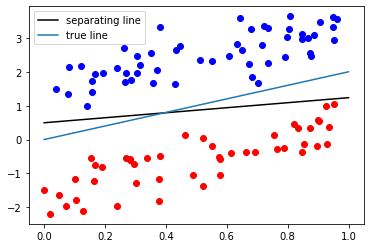

In [34]:
#same code from the displaying data from above expcept using 
for x in range(0,100):
  if labels_test[x] == 0:
    c = 2
  else:
    c = 1
  plt.scatter(X_test[x][0],X_test[x][1], color = cdict[c])
#set up x value 
x = np.linspace(0,1,100)
#sanity check
print(W_b)
w1 = W_b[0]
w2 = W_b[1]
bias = W_b[2]
pre_b = -bias/w2
pre_w = -w1/w2
#sanity check
print(pre_w)
print(pre_b)
pre_y = pre_w*x+pre_b
y = w*x+b
plt.plot(x, pre_y ,'k-',label = 'separating line')
plt.plot(x,y ,label = 'true line')
plt.legend()
plt.show()

In [0]:
def prediction(data):
  #sanity check
  print(data.shape)
  #add bias to the data
  np_data = np.column_stack((data, np.ones(shape=(data.shape[0], 1))))
  z = np.dot(np_data,W_b)
  return sigmoid(z)
def myheatmap(data):
  # Creates X, Y plane
  xx = np.linspace(0, 1, 100)
  y_min = min(data[:,1])
  y_max = max(data[:,1])
  yy = np.linspace(y_min, y_max, 100)
  X1, Y1 = np.meshgrid(xx, yy)
  # Creates Z values based on x, y grid
  X_flat = X1.flatten()
  Y_flat = Y1.flatten()
  Z = np.column_stack((X_flat, Y_flat))
  #sanity check
  print(Z.shape)
  Z = prediction(Z)
  Z = Z.reshape((100,100))

  # Configures the plot
  fig = plt.figure()
  ax = plt.axes()

  # Draws the heatmap
  contours = ax.contourf(X1, Y1, Z, 100, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')
    
  # Gives a colorbar (should be in range [0,1])
  plt.colorbar(im, ax=ax)

(10000, 2)
(10000, 2)


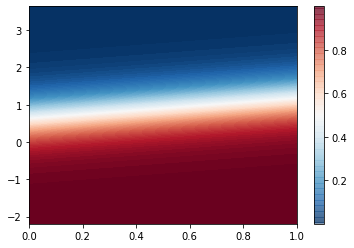

In [0]:
#display heatmap
myheatmap(X_test)